# Simulation 5: User Mobility Vs Num Migrations

TJ Kim
8/10/20

Run the second simulation with the following considerations.

- 12 users, 8 servers, 12 timesteps
- Use synthetic traces
- Job lengths: 12 ts
- Random New generation every time

Resources: Ample

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random
import itertools

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim5")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim5_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *

### Set user movement magnitude settings

This is the magnitude they move in.
We will also sweep batch rate.

In [2]:
batch_settings = [0,3,6]
mvmt_mag_settings = [1/0.1,1/0.3,1/0.5,1/1,1/2,1/3]
batch_mig_stores = {}
for val in batch_settings:
    for mvmt in mvmt_mag_settings:
        batch_mig_stores[(mvmt,val)] = []

### Run 10 trials each for each setting

In [3]:
num_trial = 10
key = "mig_rate"

for (i,batch_val, mvmt_mag) in itertools.product(range(num_trial),batch_settings,mvmt_mag_settings):
    print("trial, batch_val, mag:",i,batch_val,mvmt_mag)
    users, servers, links, jobs, sim_param = simulation_setting(mvmt_mag,batch_val)
    
    Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    Batch_plan = Migration_Plans(users,jobs,sim_param)
    Batch_plan.from_seq_greedy(Batch_prob)
    
    num_mig_cumul = 0
    
    for u in range(len(jobs)):
        num_mig_cumul += np.sum(Batch_plan.mig_plan_dict[u][key])
    
    batch_mig_stores[(mvmt_mag,batch_val)] += [num_mig_cumul]

trial, batch_val, mag: 0 0 10.0
trial, batch_val, mag: 0 0 3.3333333333333335
trial, batch_val, mag: 0 0 2.0
trial, batch_val, mag: 0 0 1.0
trial, batch_val, mag: 0 0 0.5
trial, batch_val, mag: 0 0 0.3333333333333333
trial, batch_val, mag: 0 3 10.0
trial, batch_val, mag: 0 3 3.3333333333333335
trial, batch_val, mag: 0 3 2.0
trial, batch_val, mag: 0 3 1.0
trial, batch_val, mag: 0 3 0.5
trial, batch_val, mag: 0 3 0.3333333333333333
trial, batch_val, mag: 0 6 10.0
trial, batch_val, mag: 0 6 3.3333333333333335
trial, batch_val, mag: 0 6 2.0
trial, batch_val, mag: 0 6 1.0
trial, batch_val, mag: 0 6 0.5
trial, batch_val, mag: 0 6 0.3333333333333333
trial, batch_val, mag: 1 0 10.0
trial, batch_val, mag: 1 0 3.3333333333333335
trial, batch_val, mag: 1 0 2.0
trial, batch_val, mag: 1 0 1.0
trial, batch_val, mag: 1 0 0.5
trial, batch_val, mag: 1 0 0.3333333333333333
trial, batch_val, mag: 1 3 10.0
trial, batch_val, mag: 1 3 3.3333333333333335
trial, batch_val, mag: 1 3 2.0
trial, batch_val, mag: 

### Process the Data

Organize each into a line to be plotted in terms of what batch group they were in. Each line sweeps across mig mvmt value.

Theoretically, batch 3 --> batch 6 --> batch 12 should the the descending order of migration rate. Migration rate should also climb as we go to higher user magnitudes.

In [4]:
batch_0_migs = []
batch_3_migs = []
batch_6_migs = []

for (batch_val, mvmt_mag) in itertools.product(batch_settings,mvmt_mag_settings):
    if batch_val == 0:
        batch_0_migs += [np.mean(batch_mig_stores[mvmt_mag,batch_val])]
    elif batch_val == 3:
        batch_3_migs += [np.mean(batch_mig_stores[mvmt_mag,batch_val])]
    elif batch_val == 6:
        batch_6_migs += [np.mean(batch_mig_stores[mvmt_mag,batch_val])]


Text(0, 0.5, 'Migrations Per User')

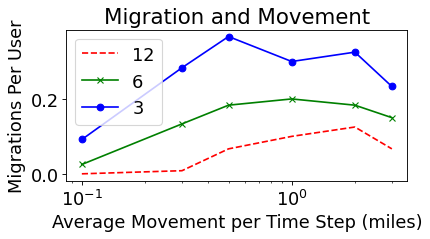

In [7]:
# Collect the correct costs
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

x_ax = np.divide(1,mvmt_mag_settings)

SG2 = [0.1,0.4,1,1.5,2.5,3.2]
B3 = [0.3,0.7,1.6,1.9,3.2,4]
B6 = [0.3,0.4,1.1,2.0,2.7,3.4]

# plt.plot(x_ax, SG2, 'r--', label = 'Seq Greedy')
# plt.plot(x_ax, B6, 'g-x', label = 'Batch size 6')
# plt.plot(x_ax, B3, 'b-o', label = 'Batch size 3')

plt.plot(x_ax, np.multiply(batch_0_migs,1/len(jobs)), 'r--', label = '12')
plt.plot(x_ax, np.multiply(batch_6_migs,1/len(jobs)), 'g-x', label = '6')
plt.plot(x_ax, np.multiply(batch_3_migs,1/len(jobs)), 'b-o', label = '3')
plt.xticks(x_ax)
plt.xscale('log')
plt.legend(loc = 'upper left')

plt.title('Migration and Movement')
plt.xlabel('Average Movement per Time Step (miles)')
plt.ylabel('Migrations Per User')

Text(0, 0.5, 'Migrations Per User')

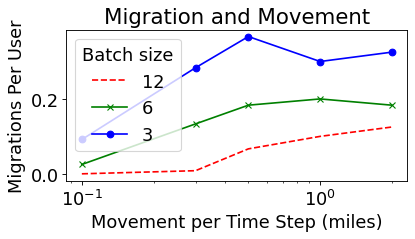

In [10]:
matplotlib.rc('font', **font)
figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_ax[:-1], np.multiply(batch_0_migs[:-1],1/len(jobs)), 'r--', label = '12')
plt.plot(x_ax[:-1], np.multiply(batch_6_migs[:-1],1/len(jobs)), 'g-x', label = '6')
plt.plot(x_ax[:-1], np.multiply(batch_3_migs[:-1],1/len(jobs)), 'b-o', label = '3')
plt.xticks(x_ax)
plt.xscale('log')
plt.legend(title = "Batch size", loc = 'upper left')

plt.title('Migration and Movement')
plt.xlabel('Movement per Time Step (miles)')
plt.ylabel('Migrations Per User')